# load leaderboard

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("../leaderboards/leaderboard_nopunc.csv")

# Ensure proper dtypes
df["WER (%)"] = pd.to_numeric(df["WER (%)"], errors="coerce")
df["CER (%)"] = pd.to_numeric(df["CER (%)"], errors="coerce")
df["Inference Time (s)"] = pd.to_numeric(df["Inference Time (s)"].astype(str).str.replace("s", ""), errors="coerce")
df["# Params (M)"] = pd.to_numeric(df["# Params (M)"], errors="coerce")

df["Model Name"] = df["Model Name"].str.replace(r"hsekhalilian/", "", regex=True)
df["Dataset Used"] = df["Dataset Used"].str.replace(r"hsekhalilian/", "", regex=True)

In [67]:
df

,Model Name,WER (%),CER (%),Inference Time (s),Dataset Used,Sample Size,# Params (M),Hugging Face Link,Hardware Info,Last Updated,Notes
0,nvidia/stt_fa_fastconformer_hybrid_large,8.74,3.03,23,sorted_commonvoice dev,1000,114.62,https://huggingface.co/nvidia/stt_fa_fastconfo...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
1,Speech_To_Text_Finetuning_01,9.03,2.88,22,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
2,Speech_To_Text_Finetuning_03_no_punc_with_encoder,9.06,3.00,20,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 4060 Ti (CUDA 12.8),2025-07-28,NaN
3,stt_fa_fastconformer_updated_tokenizer_01,9.82,3.27,20,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/stt_fa_fas...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
4,stt_fa_fastconformer_updated_tokenizer,9.98,3.42,22,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/stt_fa_fas...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
5,stt_fa_fastconformer_updated_tokenizer_01,10.78,3.25,21,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/stt_fa_fas...,NVIDIA GeForce RTX 4060 Ti (CUDA 12.8),2025-07-28,NaN
6,Speech_To_Text_Finetuning_03,11.95,4.32,21,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
7,speech-to-text-rnnt-finetuned,13.17,4.81,20,sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/speech-to-...,NVIDIA GeForce RTX 4060 Ti (CUDA 12.8),2025-07-28,NaN
8,Speech_To_Text_Finetuning_03_no_punc_with_encoder,13.82,6.13,13,fleurs validation,369,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
9,stt_fa_fastconformer_updated_tokenizer_01,14.24,6.03,14,fleurs validation,369,114.62,https://huggingface.co/hsekhalilian/stt_fa_fas...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN


# WER and CER by Model

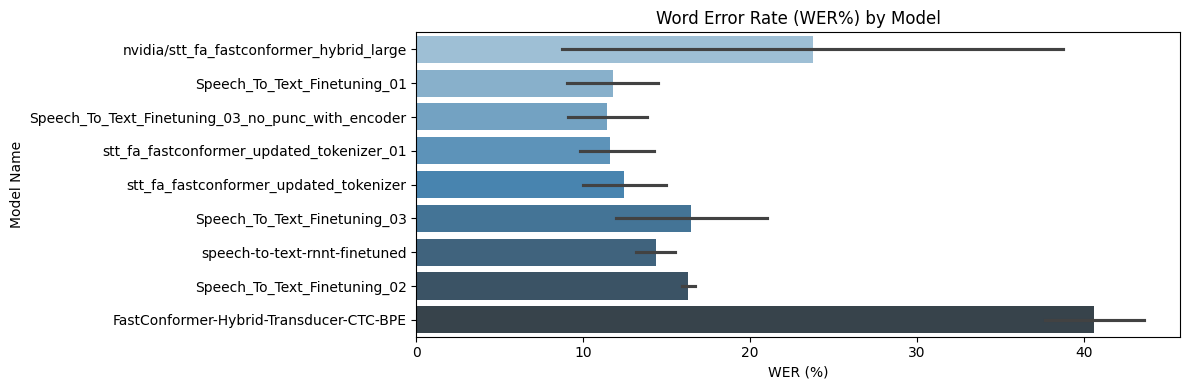

In [68]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=df.sort_values("WER (%)"),
    x="WER (%)",
    y="Model Name",
    hue="Model Name",
    dodge=False,
    palette="Blues_d",
    legend=False
)
plt.title("Word Error Rate (WER%) by Model")
plt.xlabel("WER (%)")
plt.ylabel("Model Name")
plt.tight_layout()
plt.show()

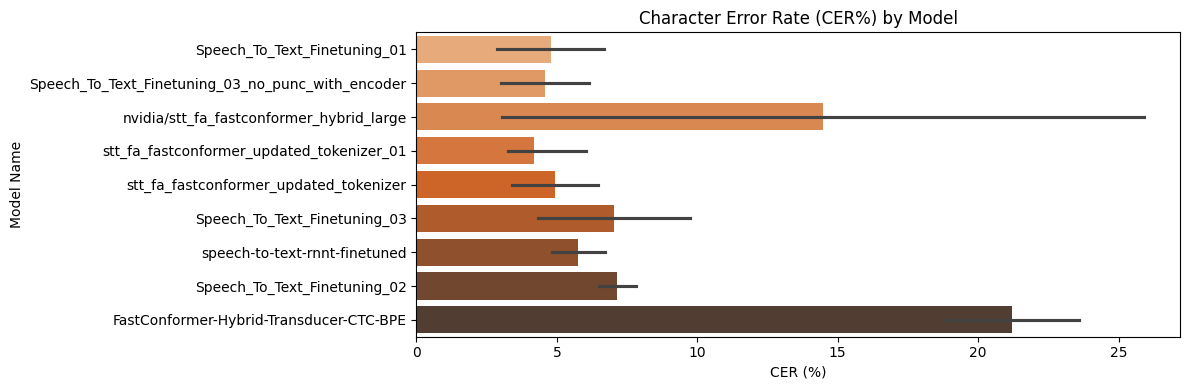

In [69]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=df.sort_values("CER (%)"),
    x="CER (%)",
    y="Model Name",
    hue="Model Name",
    dodge=False,
    palette="Oranges_d",
    legend=False
)
plt.title("Character Error Rate (CER%) by Model")
plt.xlabel("CER (%)")
plt.ylabel("Model Name")
plt.tight_layout()
plt.show()

# Inference Time vs WER Scatter Plot

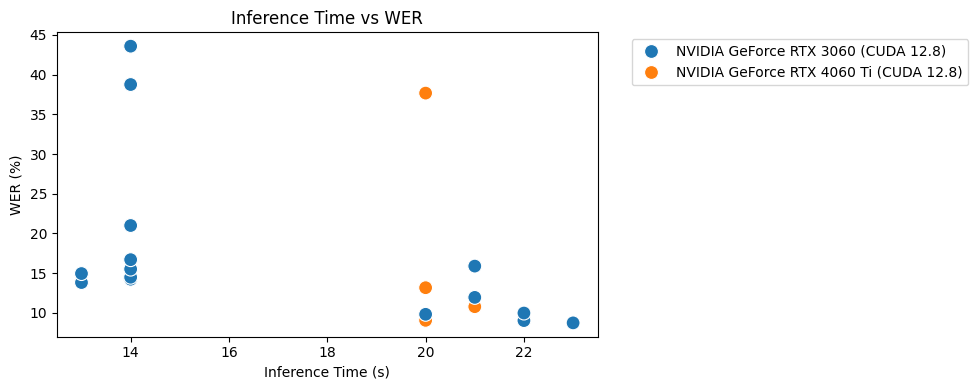

In [41]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x="Inference Time (s)", y="WER (%)", hue="Hardware Info", s=100)
plt.title("Inference Time vs WER")
plt.xlabel("Inference Time (s)")
plt.ylabel("WER (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Model Performance on Different Datasets

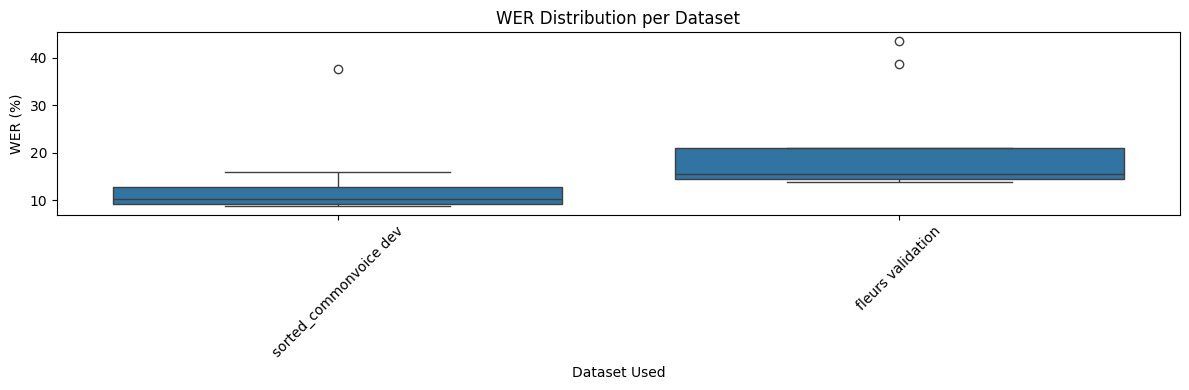

In [43]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="Dataset Used", y="WER (%)")
plt.title("WER Distribution per Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Params vs Performance

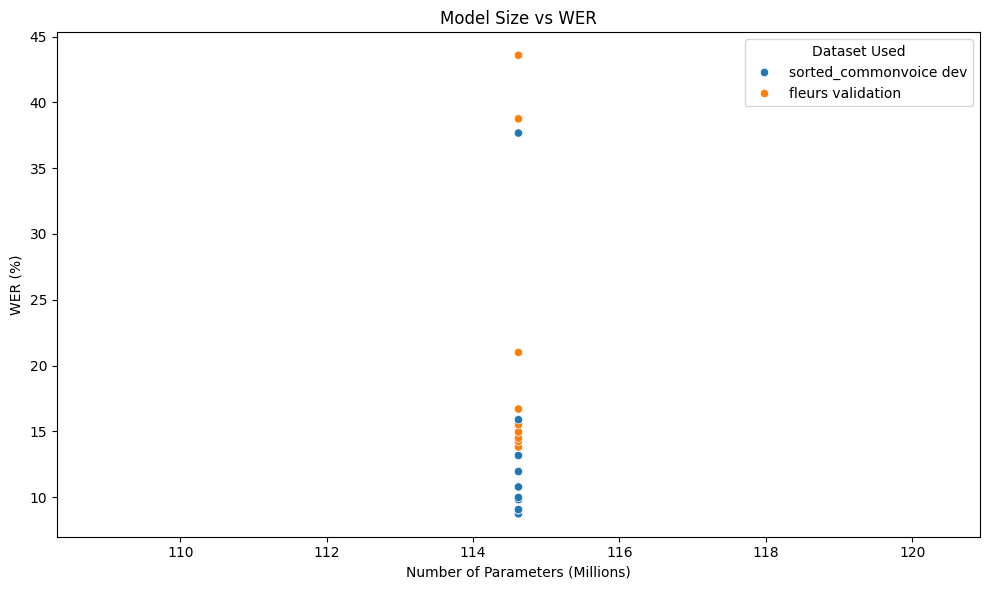

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="# Params (M)", y="WER (%)", hue="Dataset Used", sizes=(40, 200))
plt.title("Model Size vs WER")
plt.xlabel("Number of Parameters (Millions)")
plt.ylabel("WER (%)")
plt.tight_layout()
plt.show()